<a href="https://colab.research.google.com/github/leiva-mgy/Proyectos-Portafolio/blob/main/Predicci%C3%B3n_de_enfermedades_cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La OMS estima que cada año se producen 12 millones de muertes en todo el mundo debido a enfermedades cardíacas, producidas en su gran mayoría por enfermedades
cardiovasculares. El pronóstico temprano de las enfermedades cardiovasculares puede ayudar en la toma de decisiones sobre cambios en el estilo de vida en pacientes de alto riesgo y reducir las complicaciones.

La base de datos cardio.csv contiene mediciones realizadas a pacientes hace 10 años, entre los cuales se encuentran:

* Sex: M - F
* Age: edad
* Education: codificada, considerando que un valor más alto corresponde a un mayor nivel educativo.
* currentSmoker: si el paciente es o no fumador actual
* cigsPerDay: el número de cigarrillos que la persona fumaba en promedio en un día.
* BPMeds: si el paciente estaba tomando medicamentos para la presión arterial (0: No, 1: Sí)
* prevalenStroke: si el paciente había tenido un accidente cerebrovascular previamente (0: No, 1: Sí)
* prevalentHyp:: si el paciente era hipertenso o no
 (0: No, 1: Sí)
* diabetes: si el paciente tenía diabetes o no (0: No, 1: Sí)
* totChol: nivel de colesterol total
* sysBP: presión arterial sistólica
* diaBP_BMI: presión arterial diastólica
* BMI: Índice de masa corporal
* heartRate: : ritmo cardíaco
* glucose: nivel de glucosa
* TenYearCHD: se indica si el paciente sufrió o no una enfermedad coronaria en los últimos 10 años.(0: No, 1: Sí)

A partir de estos datos, buscaremos realizar algunas descripciones predictivos.

In [ ]:
from logging import warning
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,confusion_matrix, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc, mean_squared_error, r2_score
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('cardio.csv')
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


###**1. Carga los datos y explóralos. Elimina los datos nulos o incorrectos**

In [ ]:
print("Información general del dataset:")
print(df.info())  # Verificar información general del dataset

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), ob

In [ ]:
print("\nResumen estadístico para las variables cuantitativas:")
print(df.describe())  # Resumen estadístico para las variables cuantitativas


Resumen estadístico para las variables cuantitativas:
               age    education   cigsPerDay       BPMeds  prevalentStroke  \
count  4238.000000  4133.000000  4209.000000  4185.000000      4238.000000   
mean     49.584946     1.978950     9.003089     0.029630         0.005899   
std       8.572160     1.019791    11.920094     0.169584         0.076587   
min      32.000000     1.000000     0.000000     0.000000         0.000000   
25%      42.000000     1.000000     0.000000     0.000000         0.000000   
50%      49.000000     2.000000     0.000000     0.000000         0.000000   
75%      56.000000     3.000000    20.000000     0.000000         0.000000   
max      70.000000     4.000000    70.000000     1.000000         1.000000   

       prevalentHyp     diabetes      totChol        sysBP        diaBP  \
count   4238.000000  4238.000000  4188.000000  4238.000000  4238.000000   
mean       0.310524     0.025720   236.721585   132.352407    82.893464   
std        0.4627

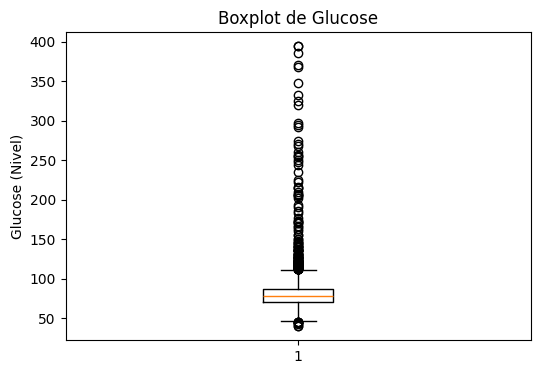

In [ ]:
# Boxplot para la variable 'glucose'
plt.figure(figsize=(6, 4))
plt.boxplot(df['glucose'].dropna(), vert=True)
plt.title('Boxplot de Glucose')
plt.ylabel('Glucose (Nivel)')
plt.show()

Para la glucosa no podemos simplemente eliminar los datos por que perderiamos el 9.2 % de los datos.

En el caso de la glucosa vamos a usar la mediana ya que tiene demasiados valores extremos y eso esa que la media pierda representatividad.


In [ ]:
df['glucose'].fillna(df['glucose'].median(), inplace=True)

# Confirmación de que no quedan valores nulos
print("\nConfirmación después de imputar valores nulos:")
print(df.info())


Confirmación después de imputar valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9

In [ ]:
# Identificar y eliminar datos nulos
df = df.dropna()
print("\nConfirmación después de eliminar datos nulos:")
print(df.info())  # Confirmar que no hay datos nulos


Confirmación después de eliminar datos nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 3987 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3987 non-null   object 
 1   age              3987 non-null   int64  
 2   education        3987 non-null   float64
 3   currentSmoker    3987 non-null   object 
 4   cigsPerDay       3987 non-null   float64
 5   BPMeds           3987 non-null   float64
 6   prevalentStroke  3987 non-null   int64  
 7   prevalentHyp     3987 non-null   int64  
 8   diabetes         3987 non-null   int64  
 9   totChol          3987 non-null   float64
 10  sysBP            3987 non-null   float64
 11  diaBP            3987 non-null   float64
 12  BMI              3987 non-null   float64
 13  heartRate        3987 non-null   float64
 14  glucose          3987 non-null   float64
 15  TenYearCHD       3987 non-null   int64  
dtypes: float64(9), int

In [ ]:
# Visualización de las primeras filas para inspección manual
print("\nPrimeras filas del dataset:")
print(df.head())


Primeras filas del dataset:
  sex  age  education currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0   M   39        4.0            No         0.0     0.0                0   
1   F   46        2.0            No         0.0     0.0                0   
2   M   48        1.0           Yes        20.0     0.0                0   
3   F   61        3.0           Yes        30.0     0.0                0   
4   F   46        3.0           Yes        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1      

###**2. Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas, utilizando indicadores y gráficos. ¿Cual presenta mayor dispersión?**

In [ ]:
# Cálculo de indicadores descriptivos
variables = ['age', 'totChol', 'glucose']
descriptive_stats = df[variables].describe()
print("Estadísticas descriptivas para 'age', 'totChol', y 'glucose':")
print(descriptive_stats)

Estadísticas descriptivas para 'age', 'totChol', y 'glucose':
               age      totChol      glucose
count  3987.000000  3987.000000  3987.000000
mean     49.478806   236.620517    81.535992
std       8.531588    44.019766    22.920572
min      32.000000   113.000000    40.000000
25%      42.000000   206.000000    72.000000
50%      49.000000   234.000000    78.000000
75%      56.000000   263.000000    85.000000
max      70.000000   600.000000   394.000000


In [ ]:
# Cálculo de varianza, desviación estándar y coeficiente de variabilidad para analizar la dispersión
for var in variables:
    varianza = df[var].var()
    desviacion = df[var].std()
    media = df[var].mean()
    coeficiente_variabilidad = (desviacion / media) * 100 if media != 0 else None  # Evitar división por cero
    print(f"\nPara {var}: Varianza = {varianza:.2f}, Desviación Estándar = {desviacion:.2f}, Coeficiente de Variabilidad = {coeficiente_variabilidad:.2f}%" if coeficiente_variabilidad is not None else f"\nPara {var}: Varianza = {varianza:.2f}, Desviación Estándar = {desviacion:.2f}, Coeficiente de Variabilidad no definido (media = 0)")



Para age: Varianza = 72.79, Desviación Estándar = 8.53, Coeficiente de Variabilidad = 17.24%

Para totChol: Varianza = 1937.74, Desviación Estándar = 44.02, Coeficiente de Variabilidad = 18.60%

Para glucose: Varianza = 525.35, Desviación Estándar = 22.92, Coeficiente de Variabilidad = 28.11%


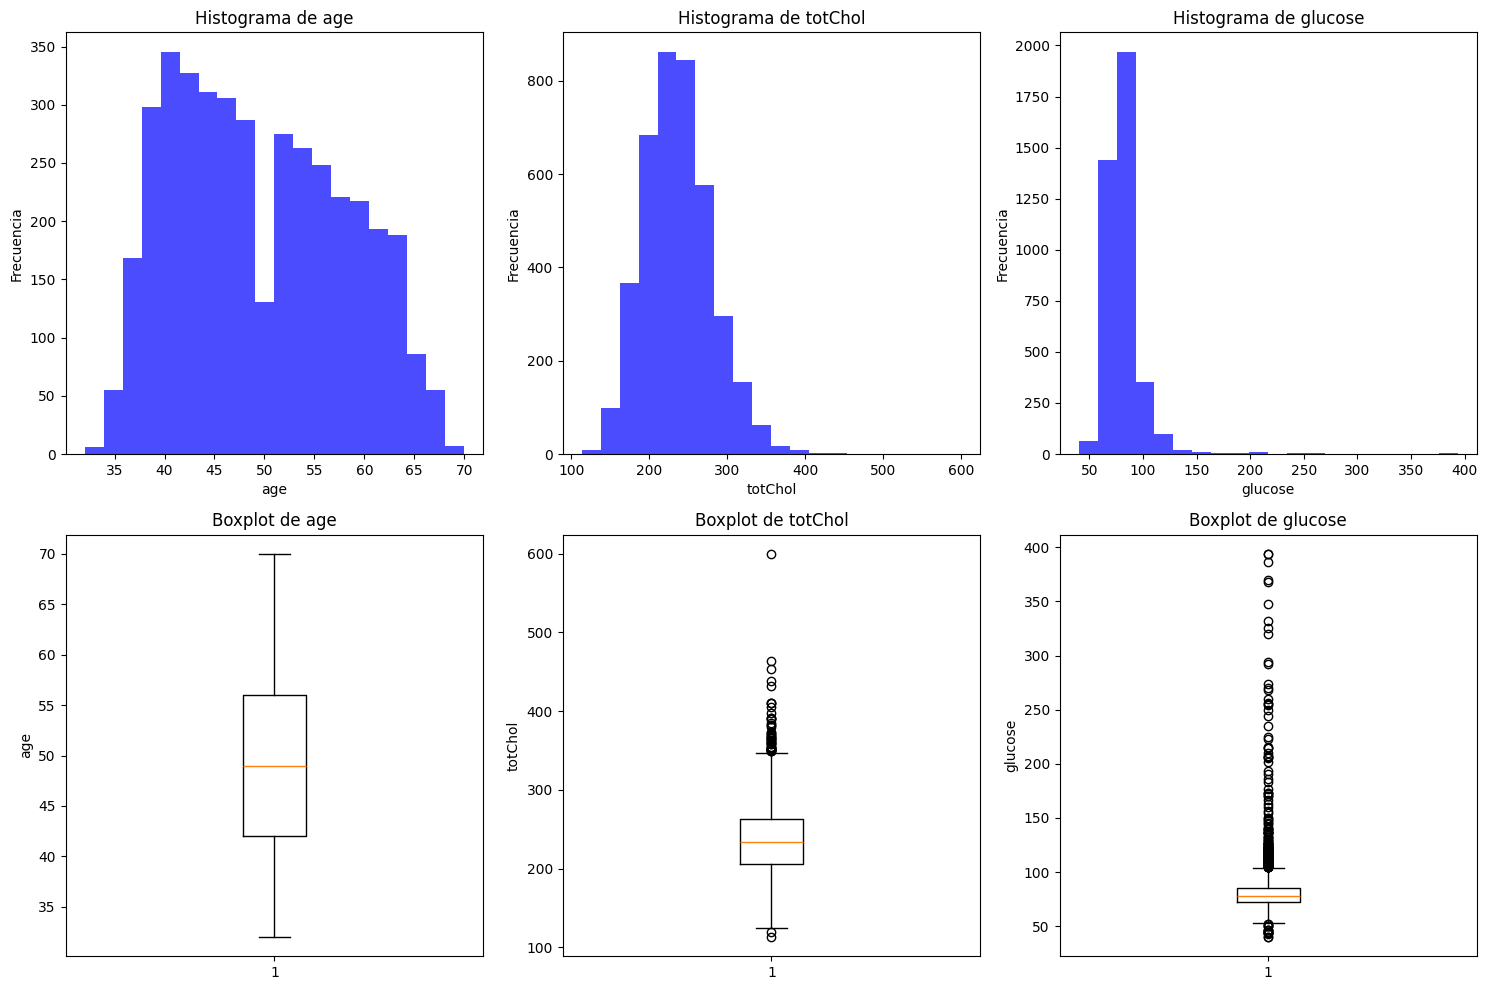

In [ ]:
# Visualización de cada variable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, var in enumerate(variables):
    # Histograma
    axes[0, i].hist(df[var].dropna(), bins=20, alpha=0.7, color='blue')
    axes[0, i].set_title(f'Histograma de {var}')
    axes[0, i].set_xlabel(var)
    axes[0, i].set_ylabel('Frecuencia')

    # Boxplot
    axes[1, i].boxplot(df[var].dropna(), vert=True)
    axes[1, i].set_title(f'Boxplot de {var}')
    axes[1, i].set_ylabel(var)

plt.tight_layout()
plt.show()

La variable que presenta mayor dispersión es la glucosa siendo esta un 28.11%

###**3. Elimina los datos atípicos del dataset. Para las siguientes preguntas, considera el dataset "limpio"**

In [ ]:
# Función para eliminar outliers usando el método IQR
def eliminar_outliers(df):
    # Solo se aplicará a columnas numéricas
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrar el DataFrame para eliminar outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Eliminar outliers del DataFrame
df_por_limpiar = df[['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
df_limpio = eliminar_outliers(df_por_limpiar)

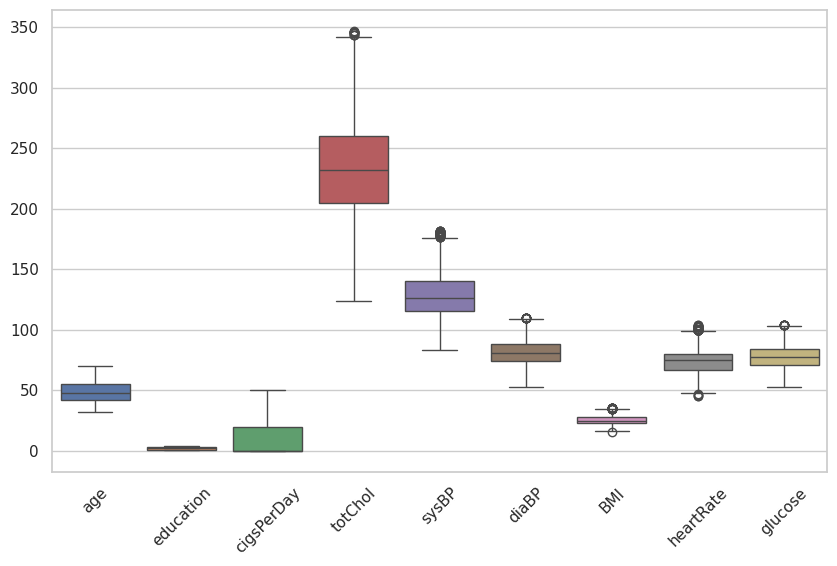

In [ ]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

num_cols = df_limpio.select_dtypes(include='number').columns[:9]  # Ajusta si hay más o menos de 9 columnas

# Crear el boxplot para todas las columnas numéricas en un solo gráfico
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_limpio[num_cols])
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.show()

In [ ]:
df_sin_limpiar = df [['sex', 'currentSmoker', 'prevalentStroke', 'BPMeds', 'prevalentHyp', 'diabetes', 'TenYearCHD']] # variables que no necesitan ser filtradas por valores atipicos
df_limpio = df_limpio.merge(df_sin_limpiar, left_index=True, right_index=True, how='inner', suffixes=('', '_drop'))
df_limpio = df_limpio.loc[:, ~df_limpio.columns.str.endswith('_drop')]
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3417 entries, 0 to 4236
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3417 non-null   int64  
 1   education        3417 non-null   float64
 2   cigsPerDay       3417 non-null   float64
 3   totChol          3417 non-null   float64
 4   sysBP            3417 non-null   float64
 5   diaBP            3417 non-null   float64
 6   BMI              3417 non-null   float64
 7   heartRate        3417 non-null   float64
 8   glucose          3417 non-null   float64
 9   sex              3417 non-null   object 
 10  currentSmoker    3417 non-null   object 
 11  prevalentStroke  3417 non-null   int64  
 12  BPMeds           3417 non-null   float64
 13  prevalentHyp     3417 non-null   int64  
 14  diabetes         3417 non-null   int64  
 15  TenYearCHD       3417 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 453.8+ KB


###**4. ¿Qué variables cuantitativas presentan mayor correlación? Explica.**


In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df_limpio.corr(numeric_only=True)

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

Matriz de Correlación:
                      age  education  cigsPerDay   totChol     sysBP  \
age              1.000000  -0.139981   -0.183188  0.276013  0.363487   
education       -0.139981   1.000000   -0.002951 -0.023422 -0.117980   
cigsPerDay      -0.183188  -0.002951    1.000000 -0.022907 -0.061965   
totChol          0.276013  -0.023422   -0.022907  1.000000  0.204483   
sysBP            0.363487  -0.117980   -0.061965  0.204483  1.000000   
diaBP            0.176112  -0.046422   -0.036969  0.191105  0.759319   
BMI              0.127794  -0.110065   -0.076162  0.160658  0.275849   
heartRate       -0.032117  -0.053854    0.078291  0.081276  0.149490   
glucose          0.078097   0.005318   -0.075397  0.012257  0.066141   
prevalentStroke  0.041548  -0.021529   -0.027006 -0.002471  0.059294   
BPMeds           0.099584   0.009996   -0.038000  0.042647  0.184902   
prevalentHyp     0.271922  -0.062843   -0.045497  0.144587  0.682332   
diabetes         0.021327   0.011007   -0

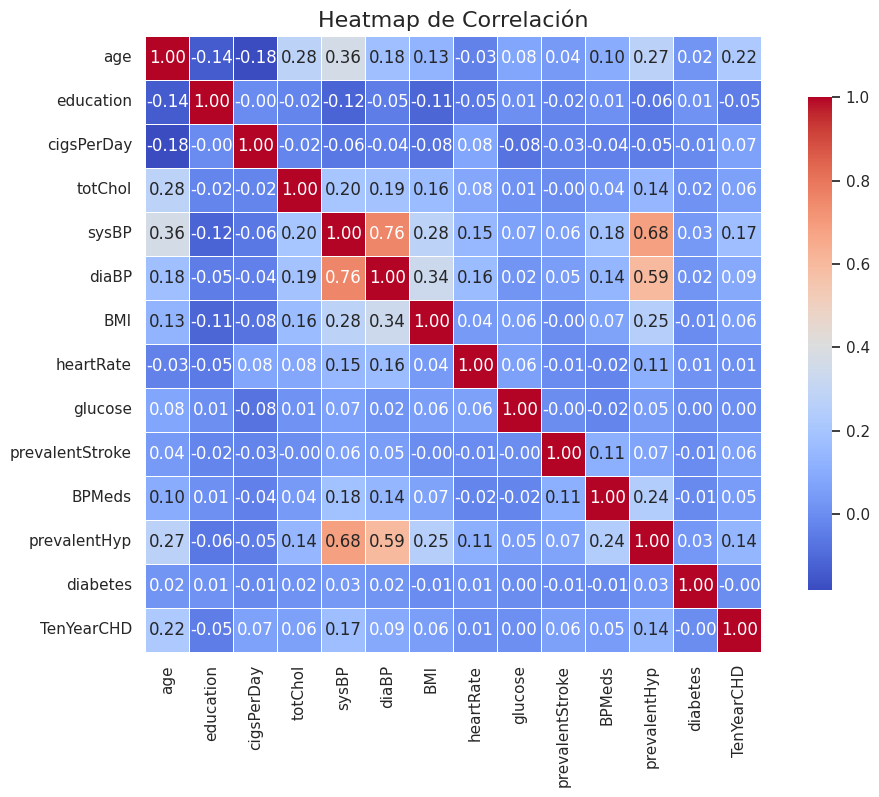

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(correlation_matrix,
             annot=True,              # Mostrar los valores de correlación en el mapa
             fmt=".2f",               # Formato de los números
             cmap='coolwarm',         # Mapa de colores
             square=True,             # Hacer las celdas cuadradas
             cbar_kws={"shrink": .8}, # Tamaño de la barra de color
             linewidths=.5)           # Ancho de las líneas que separan las celdas

# Títulos y etiquetas
plt.title('Heatmap de Correlación', size=16)
plt.show()


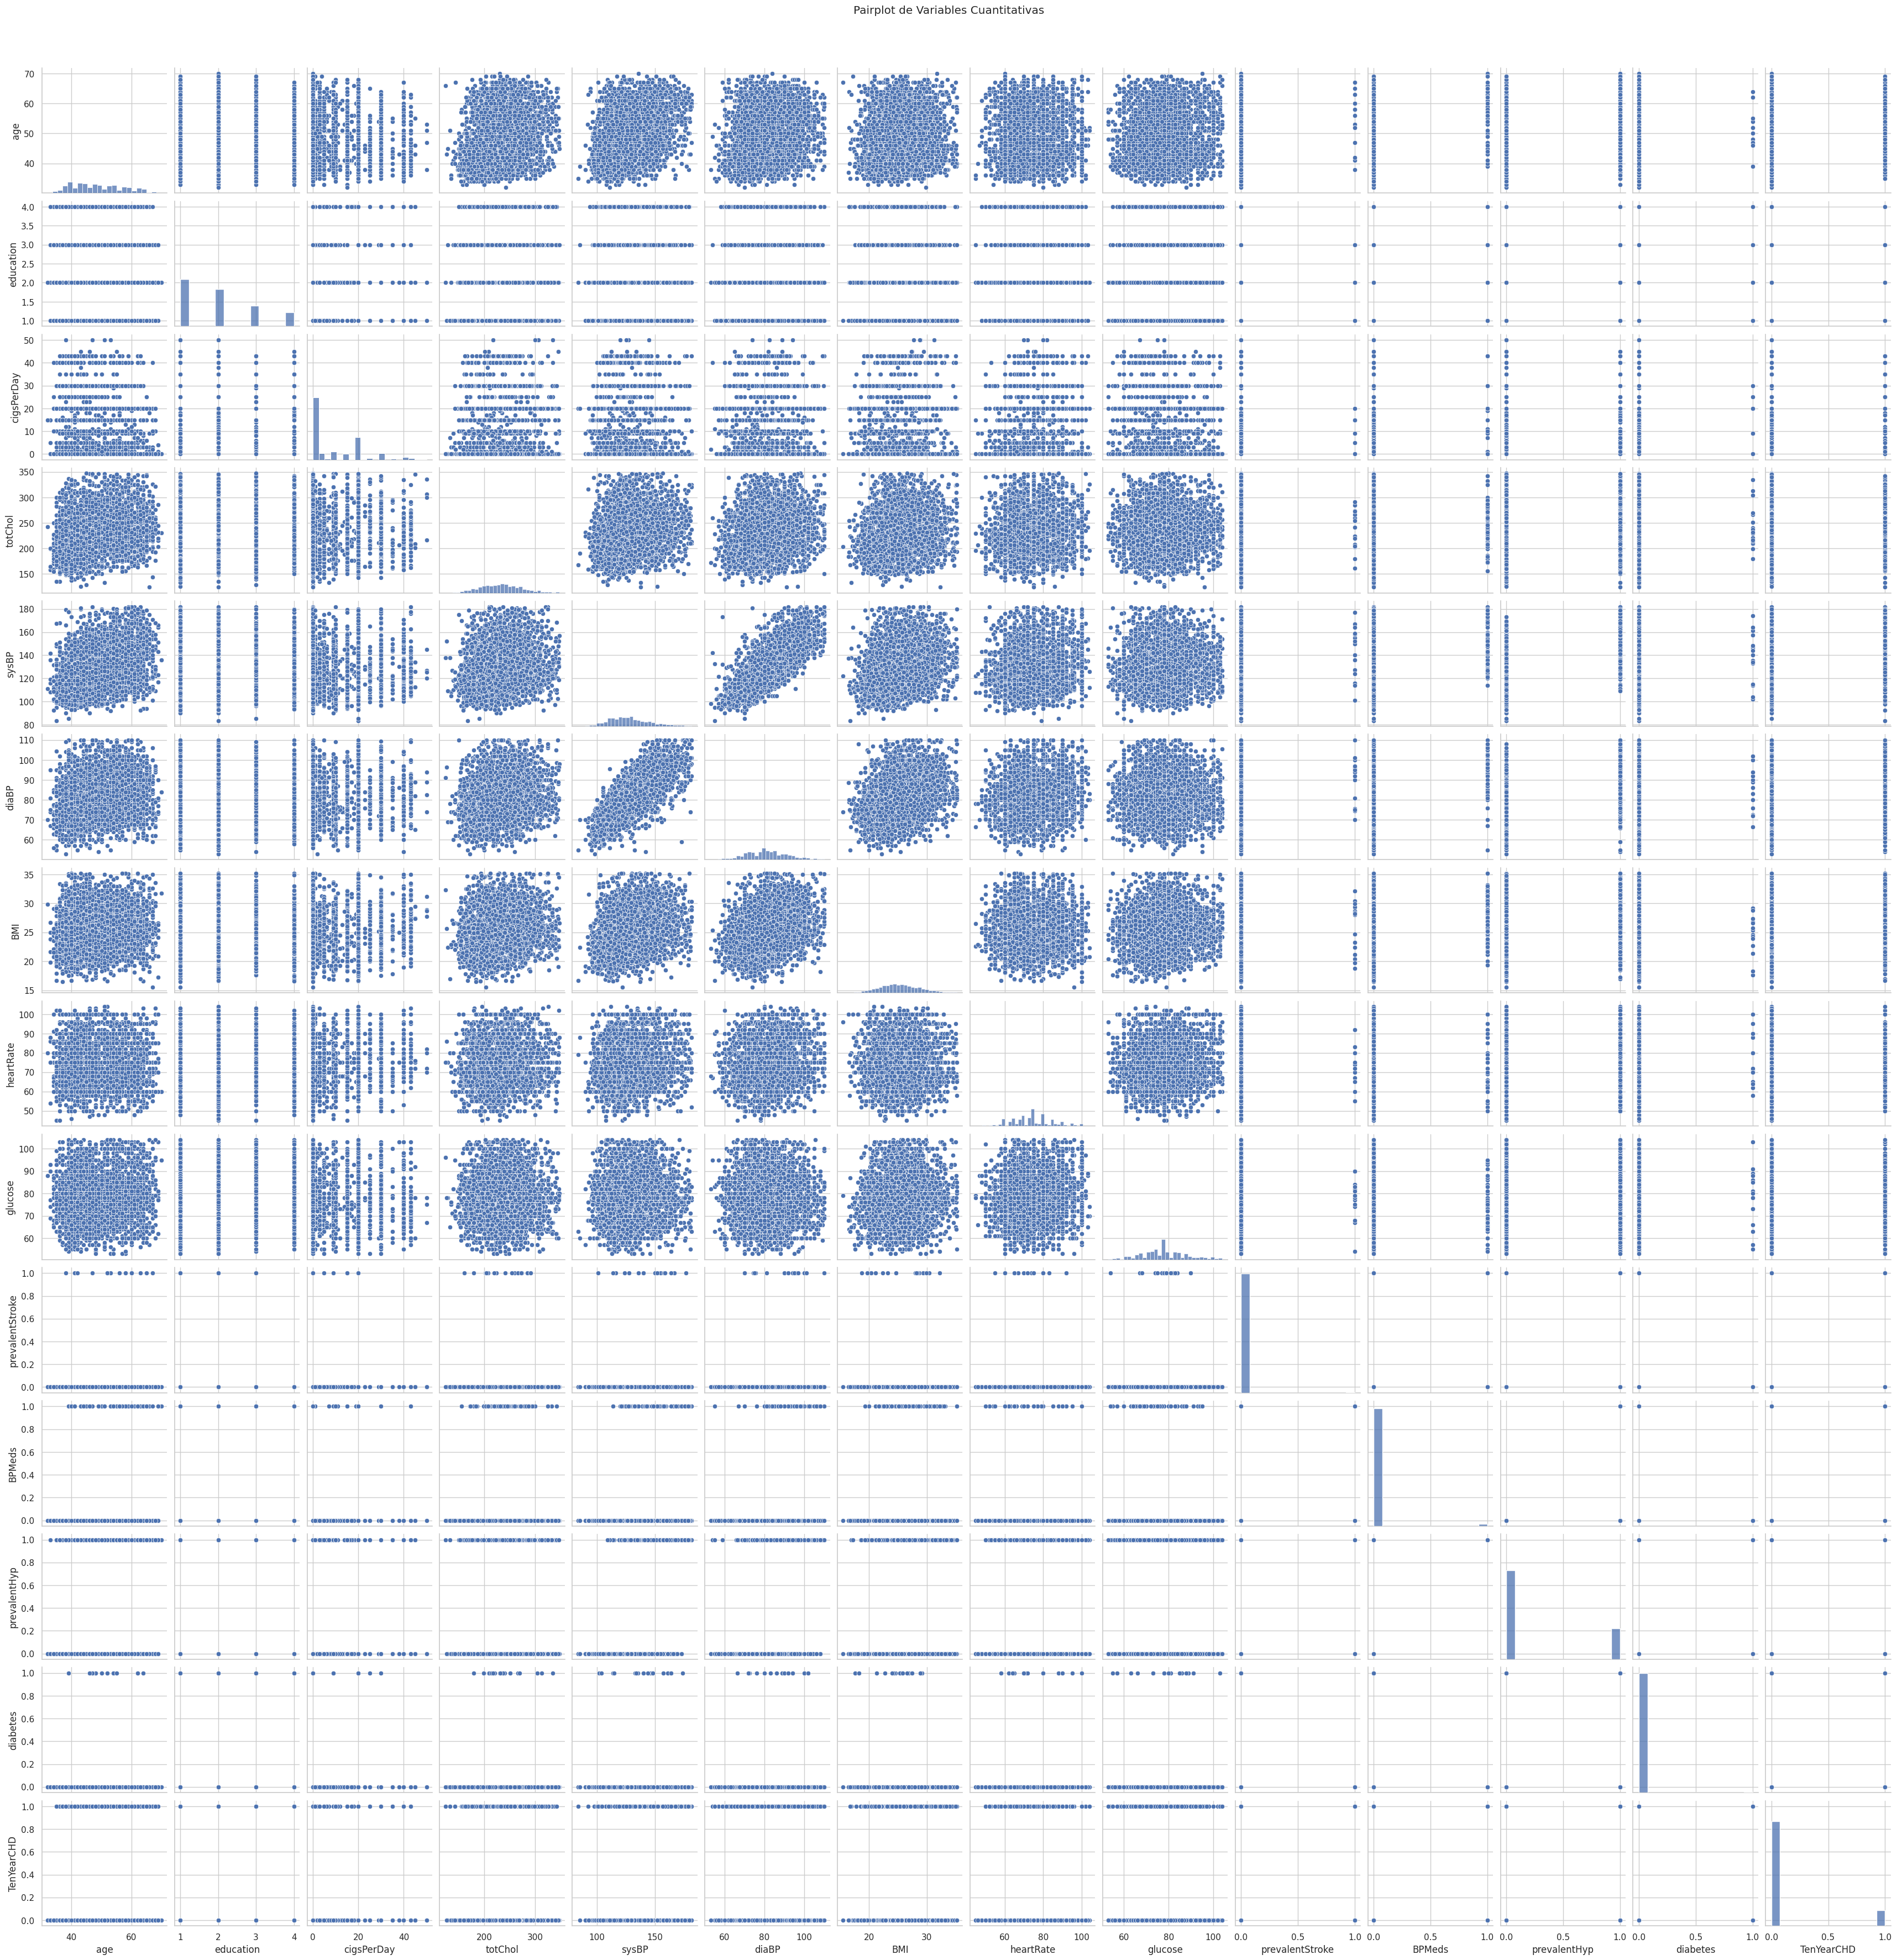

In [ ]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear un pairplot para las variables cuantitativas
pairplot = sns.pairplot(df_limpio)
plt.suptitle('Pairplot de Variables Cuantitativas', y=1.02)  # Ajustar el título
plt.show()

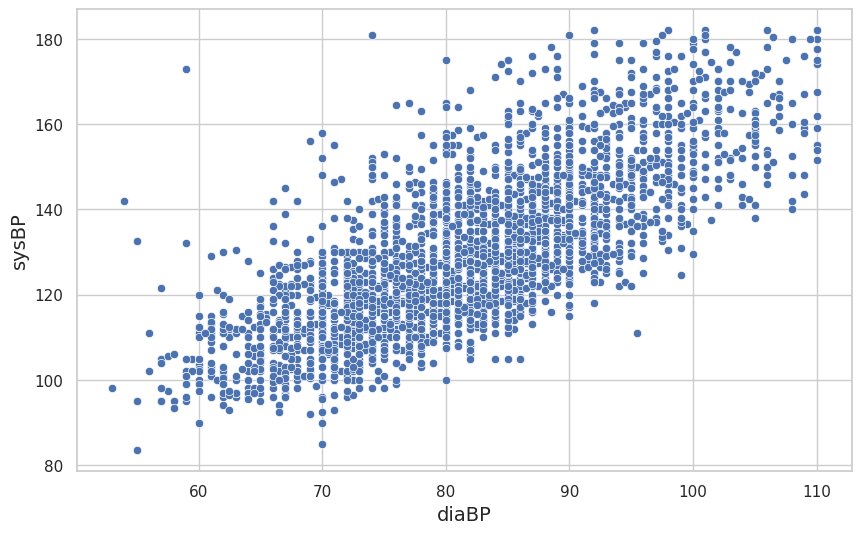

In [ ]:
sns.set(style="whitegrid")

# Crear un scatter plot de BMI vs totChol
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_limpio, x='diaBP', y='sysBP')

# Títulos y etiquetas
plt.xlabel('diaBP', fontsize=14)
plt.ylabel('sysBP', fontsize=14)
plt.show()

Las variables cuantitativas que presentan mayor correlación son sysBP con diaBP presentando una corrección de un 76%

###**5. Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al índice de masa corporal?**


In [ ]:
# Calcular el cuartil superior (75%)
cuartil_superior = df_limpio['BMI'].quantile(0.75)
print(f"Cuartil Superior del BMI: {cuartil_superior}")

Cuartil Superior del BMI: 27.64


In [ ]:
# Filtrar el DataFrame para obtener pacientes en el mayor cuartil del BMI
pacientes_mayor_cuartil = df_limpio[df_limpio['BMI'] >= cuartil_superior]

# Contar cuántos de esos pacientes son hombres
num_hombres = pacientes_mayor_cuartil[pacientes_mayor_cuartil['sex'] == 'male'].shape[0]
print(f"Número de hombres en el mayor cuartil de BMI: {num_hombres}")

Número de hombres en el mayor cuartil de BMI: 0


In [ ]:
# Contar el total de pacientes en el mayor cuartil del BMI
total_pacientes_mayor_cuartil = pacientes_mayor_cuartil.shape[0]

# Calcular la probabilidad
probabilidad_hombre = num_hombres / total_pacientes_mayor_cuartil if total_pacientes_mayor_cuartil > 0 else 0

print(f"Probabilidad de que un paciente sea hombre dado que pertenece al mayor cuartil de BMI: {probabilidad_hombre:.2f}")

Probabilidad de que un paciente sea hombre dado que pertenece al mayor cuartil de BMI: 0.00


###**6. ¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro del dataset), su ritmo cardiaco promedio es 75? Explica y justifica.**


In [ ]:
mean_heart_rate = df_limpio['heartRate'].mean()
std_heart_rate = df_limpio['heartRate'].std()

print(f"Ritmo cardiaco promedio: {mean_heart_rate:.2f}, Desviación estándar: {std_heart_rate:.2f}")

Ritmo cardiaco promedio: 74.61, Desviación estándar: 10.83


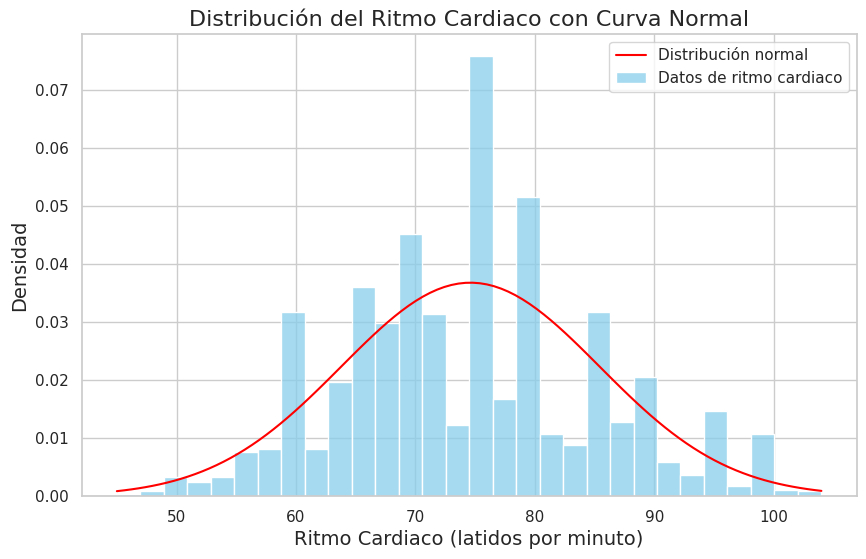

In [ ]:
# Extraer la columna de ritmo cardiaco
heart_rate = df_limpio['heartRate']

# Calcular la media y desviación estándar del ritmo cardiaco
mean_hr = heart_rate.mean()
std_hr = heart_rate.std()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el histograma del ritmo cardiaco
plt.figure(figsize=(10, 6))
sns.histplot(heart_rate, kde=False, color="skyblue", bins=30, stat="density", label="Datos de ritmo cardiaco")

# Crear la curva de distribución normal con los mismos parámetros
x_vals = np.linspace(heart_rate.min(), heart_rate.max(), 100)
normal_curve = stats.norm.pdf(x_vals, mean_hr, std_hr)
plt.plot(x_vals, normal_curve, color='red', label="Distribución normal")

# Añadir títulos y etiquetas
plt.title("Distribución del Ritmo Cardiaco con Curva Normal", fontsize=16)
plt.xlabel("Ritmo Cardiaco (latidos por minuto)", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.legend()
plt.show()

Se puede observar con el promedio del ritmo cardiaco de las personas y a través del gráfico que es normal tener un ritmo cardiaco de 75

###**7. Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los pacientes fumadores? Explica.**

In [ ]:
# Filtrar solo pacientes fumadores
fumadores = df_limpio[df_limpio['currentSmoker'] == 'Yes']

# Calcular el promedio de cigarrillos por día para hombres y mujeres
promedio_cigarrillos_hombres = fumadores[fumadores['sex'] == 'M']['cigsPerDay'].mean()
promedio_cigarrillos_mujeres = fumadores[fumadores['sex'] == 'F']['cigsPerDay'].mean()

print(f"Promedio de cigarrillos por día (hombres fumadores): {promedio_cigarrillos_hombres:.2f}")
print(f"Promedio de cigarrillos por día (mujeres fumadoras): {promedio_cigarrillos_mujeres:.2f}")

Promedio de cigarrillos por día (hombres fumadores): 21.82
Promedio de cigarrillos por día (mujeres fumadoras): 14.06


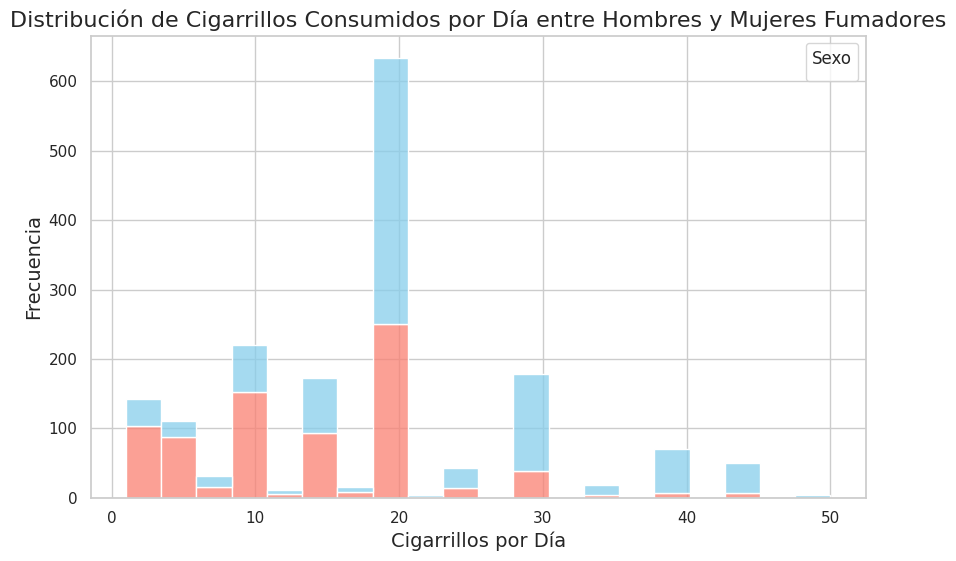

In [ ]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=fumadores, x="cigsPerDay", hue="sex", multiple="stack", bins=20, palette={"M": "skyblue", "F": "salmon"})

# Añadir títulos y etiquetas
plt.title("Distribución de Cigarrillos Consumidos por Día entre Hombres y Mujeres Fumadores", fontsize=16)
plt.xlabel("Cigarrillos por Día", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.legend(title="Sexo")
plt.show()

In [ ]:
# Realizar una prueba t de dos muestras para comparar los promedios
t_stat, p_value = stats.ttest_ind(
    fumadores[fumadores['sex'] == 'M']['cigsPerDay'],
    fumadores[fumadores['sex'] == 'F']['cigsPerDay'],
    equal_var=False  # Usa False si la varianza entre grupos es diferente
)

print(f"Valor de la estadística t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")

Valor de la estadística t: 16.88
Valor p: 0.0000


Ser hombre si afecta en el promedio de cigarrillos consumidos por día. Podemos rechazar la Hipotesis nula ya que el p valor es menor al nivel de significancia (0.05) y el promedio afirma tambíen que los hombres fuman más que las mujeres.


###**8. Construye un modelo de regresión lineal que permita relacionar 6 variables del dataset con el índice de masa corporal. (Debes incluir al menos dos variables cualitativas). Evalúa tu modelo y explica.**

In [ ]:
# Paso 1: Seleccionar variables predictoras (X) y la variable de respuesta (y)
# Elegimos variables cuantitativas y cualitativas que puedan influir en el índice de masa corporal (BMI)
X = df_limpio[['age', 'totChol', 'sysBP', 'diaBP', 'heartRate', 'sex', 'currentSmoker']]
y = df_limpio['BMI']

# Codificar las variables categóricas 'sex' y 'currentSmoker' usando get dummies
X_encoded = pd.get_dummies(X, columns=['sex', 'currentSmoker'], drop_first=True)

X_encoded['sex_M'] = X_encoded['sex_M'].replace({True: 1, False: 0})
X_encoded['currentSmoker_Yes'] = X_encoded['currentSmoker_Yes'].replace({True: 1, False: 0})
# Paso 2: Agregar una constante (intercepto) a las variables predictoras
X_encoded = sm.add_constant(X_encoded)

# Paso 3: Crear el modelo de regresión lineal y ajustarlo a los datos
model = sm.OLS(y, X_encoded).fit()

# Paso 4: Obtener el resumen de resultados del modelo
results = model.summary()
print(results)

# Calcular el Error Cuadrático Medio (MSE)
predictions = model.predict(X_encoded)
mse = ((y - predictions) ** 2).mean()

# Calcular el Error Cuadrático Medio Explicado (EMSE)
emse = mse / ((y - y.mean()) ** 2).mean()

# Obtener el valor R² del modelo
r2 = model.rsquared

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"Error Mean Squared Explicado (EMSE): {emse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     95.23
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          2.42e-127
Time:                        01:50:46   Log-Likelihood:                -8790.4
No. Observations:                3417   AIC:                         1.760e+04
Df Residuals:                    3409   BIC:                         1.765e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                14.9231      0.62

Mi modelo de regresión lineal  para relacionar las variables con el índice de masa corporal solamente puede explicar un 10% de los errores del modelo por lo que no es un buen modelo para predecir

###**9. Construye un modelo de regresión logística para predecir el riesgo de sufrir una enfermedad coronaria en los próximos diez años, a partir de las variables descritas. Verifica el balanceo de datos y evalúa tu modelo.**

In [ ]:
# Si hay desbalance, realizamos un balanceo usando sobremuestreo
df_majority = df_limpio[df_limpio['TenYearCHD'] == 0]
df_minority = df_limpio[df_limpio['TenYearCHD'] == 1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,     # muestreo con reemplazo
                                 n_samples=len(df_majority),    # igualamos el número de muestras
                                 random_state=42)  # semilla para reproducibilidad

# Combinamos ambos datasets
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Seleccionamos las variables predictoras (X) y la variable objetivo (y)
X = df_balanced.drop(columns=['TenYearCHD'])  # Eliminamos la columna de destino
y = df_balanced['TenYearCHD']

# Dividimos el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizamos las variables para mejorar el rendimiento del modelo
scaler = StandardScaler()

X_train['sex'] = X_train['sex'].replace({'M': 1, 'F': 0})
X_train['currentSmoker'] = X_train['currentSmoker'].replace({'Yes': 1, 'No': 0})

X_test['sex'] = X_test['sex'].replace({'M': 1, 'F': 0})
X_test['currentSmoker'] = X_test['currentSmoker'].replace({'Yes': 1, 'No': 0})

In [ ]:
X_train = scaler.fit_transform(X_train)  # Ajustamos y transformamos el conjunto de entrenamiento
X_test = scaler.transform(X_test)

X_test = scaler.transform(X_test)

# Entrenamos el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizamos predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Exactitud:", accuracy)
print("Matriz de Confusión:\n", conf_matrix)
print("Reporte de Clasificación:\n", class_report)
print("AUC-ROC:", roc_auc)

Exactitud: 0.5254901960784314
Matriz de Confusión:
 [[921   1]
 [846  17]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69       922
           1       0.94      0.02      0.04       863

    accuracy                           0.53      1785
   macro avg       0.73      0.51      0.36      1785
weighted avg       0.73      0.53      0.37      1785

AUC-ROC: 0.6680637839549772


Conclusión: Este modelo tiene una alta capacidad para identificar correctamente a aquellos sin riesgo de enfermedad (clase 0), pero un bajo desempeño para detectar a aquellos con riesgo de enfermedad (clase 1). Esto podría deberse a un desbalance en las clases o a una necesidad de ajustar el modelo para mejorar su sensibilidad hacia la clase positiva.

###**10. Separa los modelos de regresión anteriores en dos distintos, respectivamente, considerando alguna variable categórica. Compara y concluye.**

In [ ]:
# Dividir el DataFrame según el género
data_male = df_limpio[df_limpio['sex'] == 'M']
data_female = df_limpio[df_limpio['sex'] == 'F']

In [ ]:
# Variables independientes (modifica las columnas según tu selección en el ejercicio 8)
features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'heartRate', 'glucose']
target = 'BMI'

# Modelo para hombres
X_male = data_male[features]
y_male = data_male[target]
model_male = LinearRegression()
model_male.fit(X_male, y_male)
predictions_male = model_male.predict(X_male)
r2_male = r2_score(y_male, predictions_male)

# Modelo para mujeres
X_female = data_female[features]
y_female = data_female[target]
model_female = LinearRegression()
model_female.fit(X_female, y_female)
predictions_female = model_female.predict(X_female)
r2_female = r2_score(y_female, predictions_female)

print(f'R² para hombres: {r2_male}')
print(f'R² para mujeres: {r2_female}')

R² para hombres: 0.0826252820759582
R² para mujeres: 0.13146400445454487


In [ ]:
# Variable objetivo para riesgo coronario
target_chd = 'TenYearCHD'

# Modelo para hombres
y_male_chd = data_male[target_chd]
model_male_chd = LogisticRegression(max_iter=1000)
model_male_chd.fit(X_male, y_male_chd)
predictions_male_chd = model_male_chd.predict(X_male)
accuracy_male_chd = accuracy_score(y_male_chd, predictions_male_chd)

# Modelo para mujeres
y_female_chd = data_female[target_chd]
model_female_chd = LogisticRegression(max_iter=1000)
model_female_chd.fit(X_female, y_female_chd)
predictions_female_chd = model_female_chd.predict(X_female)
accuracy_female_chd = accuracy_score(y_female_chd, predictions_female_chd)

print(f'Precisión para hombres: {accuracy_male_chd}')
print(f'Precisión para mujeres: {accuracy_female_chd}')

Precisión para hombres: 0.8321216126900198
Precisión para mujeres: 0.9012605042016807




1.   Regresión lineal: Ambos modelos de regresión lineal (para hombres y mujeres) presentan valores bajos de R^2, en este caso valdria la pena buscar otras variables predictoras.

2.  Regresión logística: La precisión del modelo de regresión logística es alta para ambos géneros, pero el modelo para mujeres tiene un desempeño superior. Esto sugiere que las variables en el modelo son particularmente útiles para predecir el riesgo de enfermedad coronaria en mujeres.

En resumen, separar los modelos por género parece beneficiar el modelo de regresión logística, especialmente en mujeres, donde el desempeño mejora considerablemente. En cambio, para la regresión lineal, la separación no agrega mucho valor debido a la baja capacidad explicativa de las variables actuales.